In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load IMDb dataset
vocab_size = 10000
max_length = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Preprocessing
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

# Model Definition
model = Sequential([
    Embedding(vocab_size, 64, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

# Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")



C:\Users\deepa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 184ms/step - accuracy: 0.7200 - loss: 0.5241 - val_accuracy: 0.8648 - val_loss: 0.3339
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 177ms/step - accuracy: 0.9025 - loss: 0.2503 - val_accuracy: 0.8696 - val_loss: 0.3148
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.9280 - loss: 0.1881 - val_accuracy: 0.8508 - val_loss: 0.3478
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 183ms/step - accuracy: 0.9499 - loss: 0.1390 - val_accuracy: 0.8580 - val_loss: 0.3556
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.9611 - loss: 0.1162 - val_accuracy: 0.8520 - val_loss: 0.5214
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.8525 - loss: 0.5206
Test Accuracy: 0.85


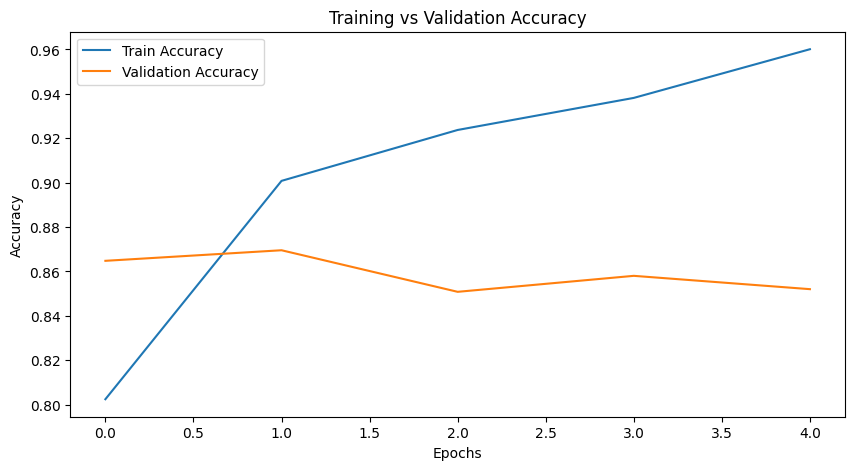

In [3]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
